In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carga del dataset

In [2]:
datos= pd.read_csv("online_shoppers_intention.csv")

In [3]:
datos.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


EDA

In [4]:
datos.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
datos.shape

(12330, 18)

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Promedio mensual de las interacciones de los usuarios en las categorías ProductRelated, Informational y Administrative. 
Compara el comportamiento de los usuarios en cada tipo de actividad por mes. El gráfico muestra que los meses donde los usuarios más entran a la pagina web son enero y noviembre y que la sección de productos de la página web es la que más paginas visitadas tiene.

<Figure size 1000x500 with 0 Axes>

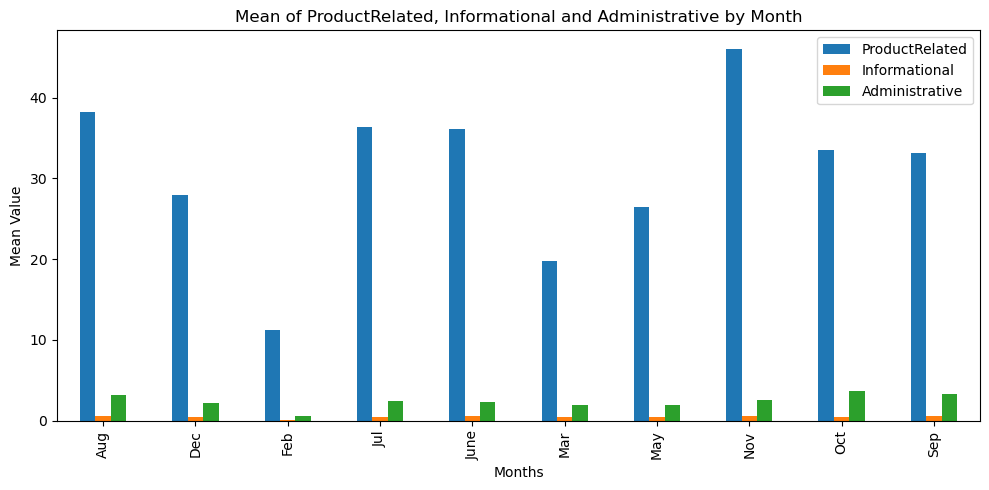

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

datos.groupby("Month")[["ProductRelated", "Informational", "Administrative"]].mean().plot(
    kind="bar", 
    figsize=(10,5)
)

plt.xlabel("Months")
plt.ylabel("Mean Value")
plt.title("Mean of ProductRelated, Informational and Administrative by Month")
plt.tight_layout()
plt.show()


## Los navegadores utilizados para acceder a la página: 
Este gráfico nos ayuda a conocer qué browsers son los más utilizados por los usuarios, para ayudarnos a tomar la decisión de en cuales hace falta una mayor promoción.

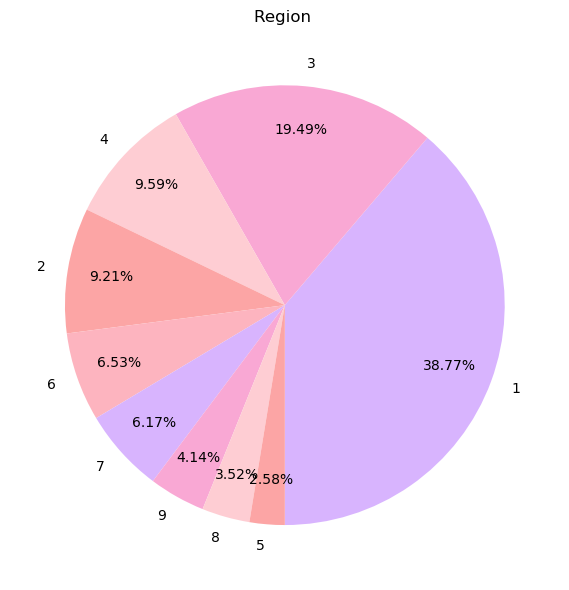

In [9]:
from itertools import cycle
import matplotlib.pyplot as plt

tipo = datos["Region"].value_counts()
tipo_rel = tipo / tipo.sum()

plt.figure(figsize=(6,6))

colores_pastel = [
    "#d8b4fe",
    "#f9a8d4",
    "#fecdd3",
    "#fca5a5",
    "#fdb4bf"
]

colores_finales = [c for c, _ in zip(cycle(colores_pastel), range(len(tipo_rel)))]

plt.pie(
    tipo_rel,
    labels=tipo_rel.index,
    autopct='%1.2f%%',
    startangle=-450,
    pctdistance=0.8,
    labeldistance=1.1,
    colors=colores_finales
)

plt.title("Region ")
plt.tight_layout()
plt.show()

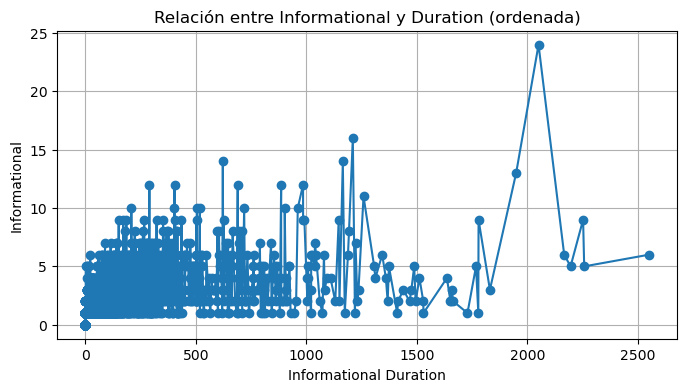

In [10]:

grupo = datos.groupby("VisitorType")[["Administrative"]]
df = datos.sort_values("Informational_Duration")

plt.figure(figsize=(8, 4))
plt.plot(df["Informational_Duration"], df["Informational"], marker="o")
plt.xlabel("Informational Duration")
plt.ylabel("Informational")
plt.title("Relación entre Informational y Duration (ordenada)")
plt.grid()
plt.show()



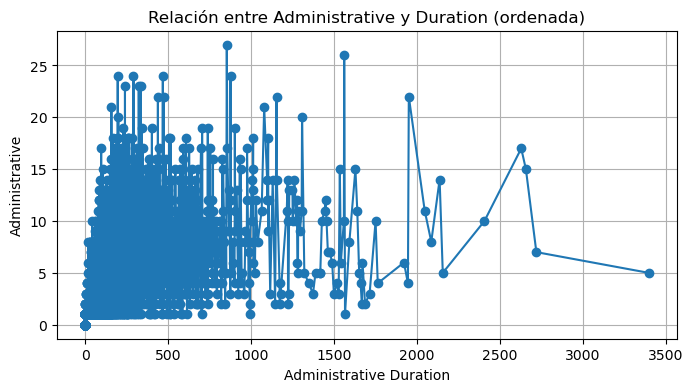

In [11]:
grupo = datos.groupby("VisitorType")[["Administrative"]]
df = datos.sort_values("Administrative_Duration")

plt.figure(figsize=(8, 4))
plt.plot(df["Administrative_Duration"], df["Administrative"], marker="o")
plt.xlabel("Administrative Duration")
plt.ylabel("Administrative")
plt.title("Relación entre Administrative y Duration (ordenada)")
plt.grid()
plt.show()


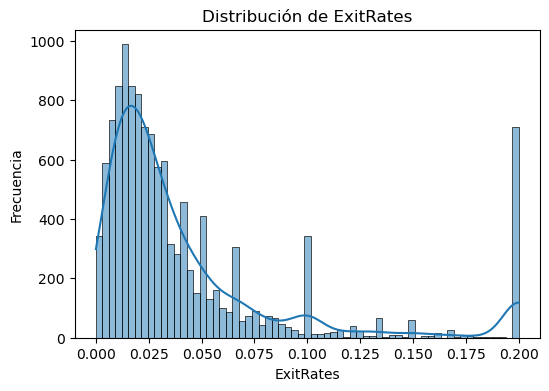

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#distribución de ExitRates

plt.figure(figsize=(6,4))
sns.histplot(datos['ExitRates'], kde=True)
plt.title("Distribución de ExitRates")
plt.xlabel("ExitRates")
plt.ylabel("Frecuencia")
plt.show()

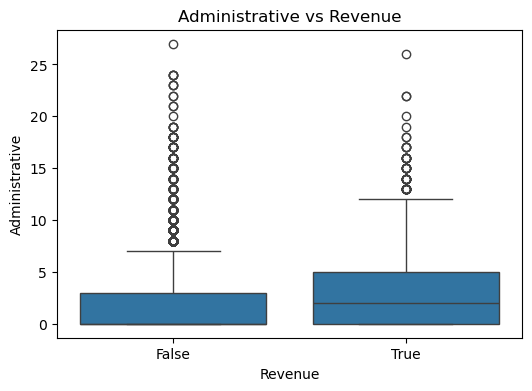

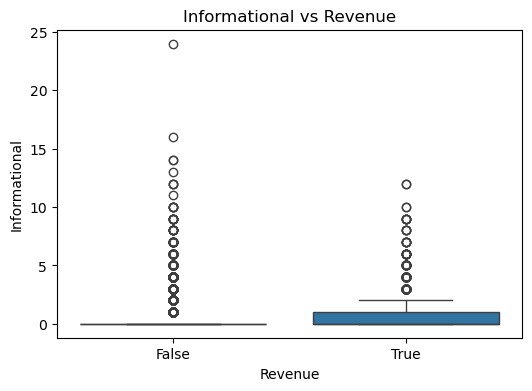

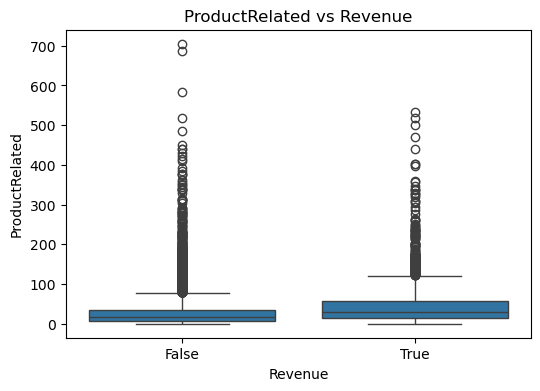

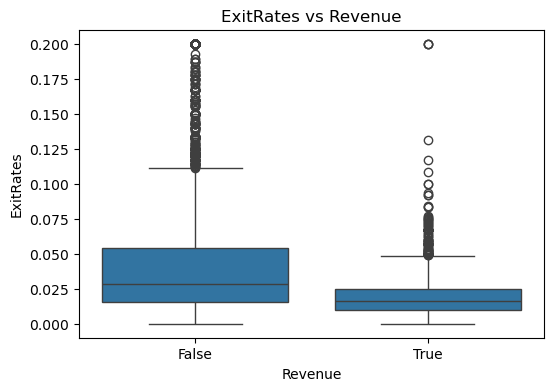

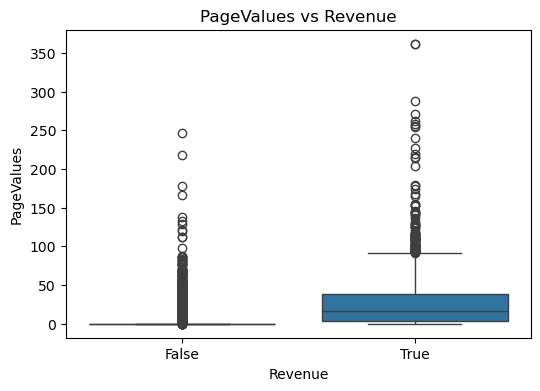

In [19]:
numeric_cols = [ 'Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'PageValues']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Revenue", y=col, data=datos)
    plt.title(f"{col} vs Revenue")
    plt.show()

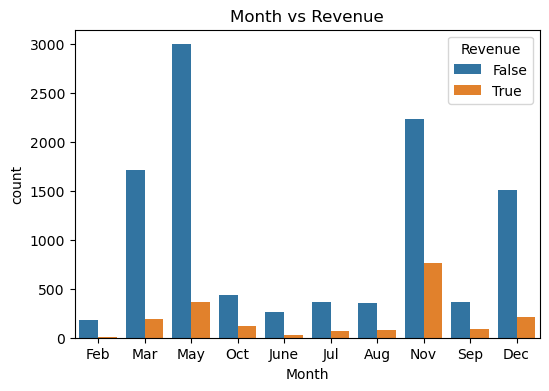

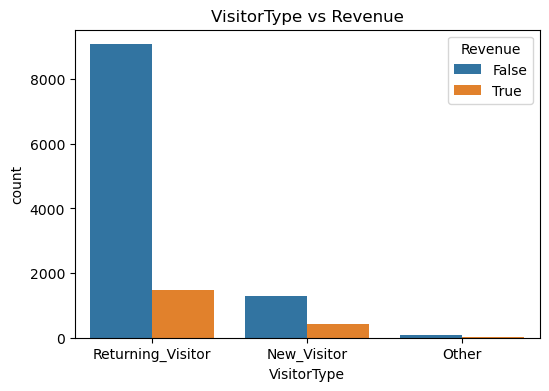

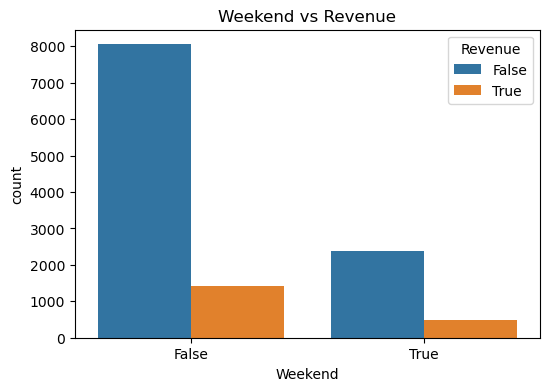

In [18]:
cat_for_revenue = ['Month', 'VisitorType', 'Weekend']
for col in cat_for_revenue:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Revenue", data=datos)
    plt.title(f"{col} vs Revenue")
    plt.show()

In [ ]:
## Paginas por tipo de visitante

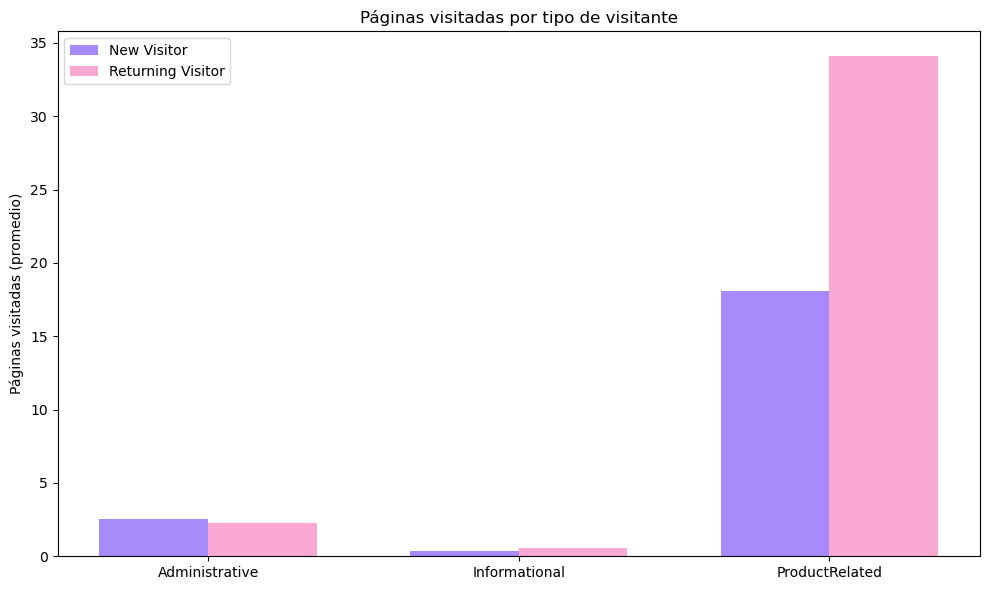

In [22]:

grupo = datos.groupby("VisitorType")[["Administrative",
                                      "Informational",
                                      "ProductRelated"]].mean()
grupo = grupo.loc[["New_Visitor", "Returning_Visitor"]]
plt.figure(figsize=(10,6))

x = range(len(grupo.columns))

new_vals = grupo.loc["New_Visitor"]
ret_vals = grupo.loc["Returning_Visitor"]

width = 0.35

plt.bar([i - width/2 for i in x], new_vals, width=width,
        label="New Visitor", color="#a78bfa")
plt.bar([i + width/2 for i in x], ret_vals, width=width,
        label="Returning Visitor", color="#f9a8d4")  

plt.xticks(x, ["Administrative", "Informational", "ProductRelated"])
plt.ylabel("Páginas visitadas (promedio)")
plt.title("Páginas visitadas por tipo de visitante")
plt.legend()

plt.tight_layout()
plt.show()


## Heatmap: matriz de correlación. 
Muestra la fuerza que tienen las relaciones entre las diferentes variables para saber el peso con el que influye una en otra. El gráfico muestra que BounceRates está muy relacionada con ExitRates con un 0.91, ProductRelated y ProductRelated_Duration también tienen gran peso el uno en el otro. Los que menos correlación tienen son el número de páginas visitadas en la sección administrativa con la tasa de salida lo que indica que en la sección administrativa los usuarios no tienden a salir de la página.


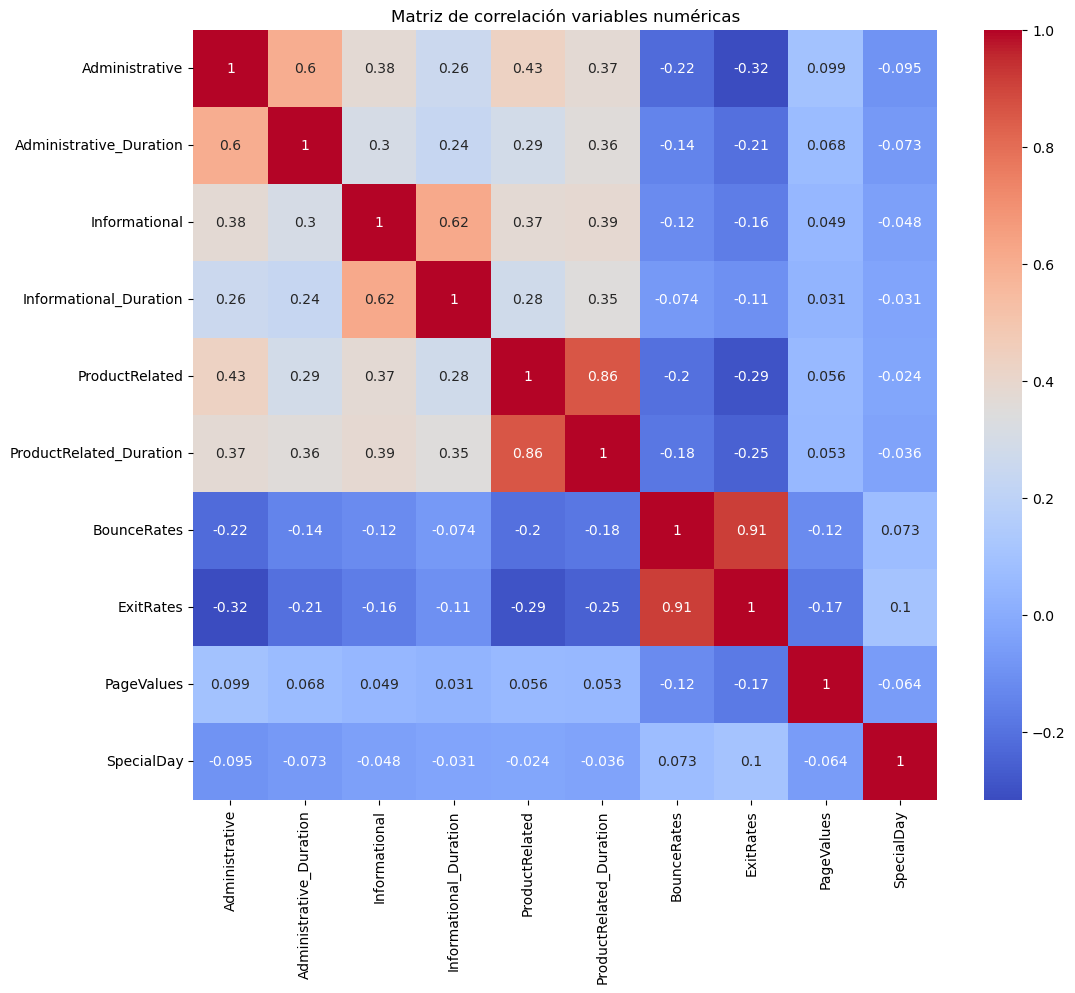

In [23]:
numeric_cols = [ 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay' ]

plt.figure(figsize=(12,10))
sns.heatmap(datos[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación variables numéricas")
plt.show()